# **Sequence Prediction with PyTorch**

Reference:
1. https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch

### Load Necessary Libraries & Packages

In [1]:
# Import the necessaty packages
import numpy as np
import pandas as pd
import math
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

## **Sine Wave Prediction**

### Generate and Visualize Data

In [2]:
# Declare the independent variable x, as a array of values between 0 and 800 (exclude)
# https://pytorch.org/docs/stable/generated/torch.linspace.html

x = torch.linspace(0, 799, 800)

In [3]:
# Print first 10 values

x[:10]

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [4]:
# Print last 10 values

x[-10:]

tensor([790., 791., 792., 793., 794., 795., 796., 797., 798., 799.])

In [5]:
# Creat the dependent variable, y as sign values

y = torch.sin(x * 2*math.pi/40)


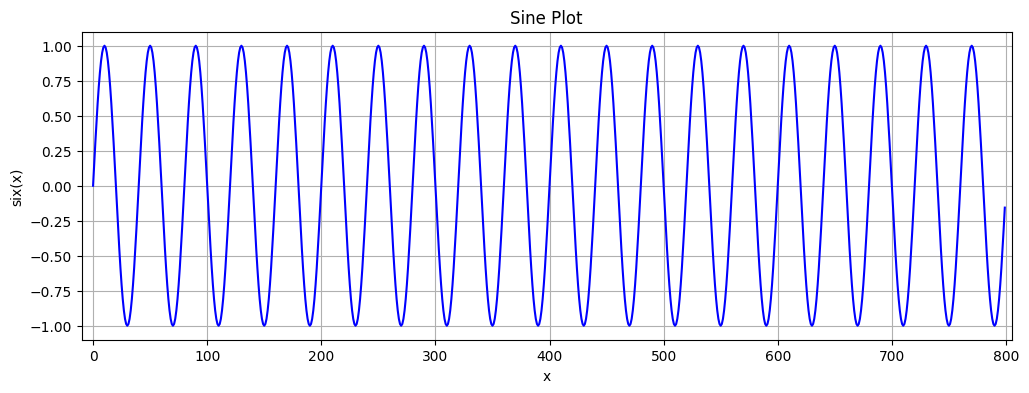

In [7]:
# Plot y against x

plt.figure(figsize=(12,4))
plt.xlim(-10,805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("six(x)")
plt.title("Sine Plot")
plt.plot(y.numpy(),color ='b')
plt.show()

### Data Pre-Processing

In [15]:
# Split the data into train/test set

test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

In [16]:
# Print Length of the train set

len(train_set)

760

In [17]:
# Print Length of the test set

len(test_set)

40

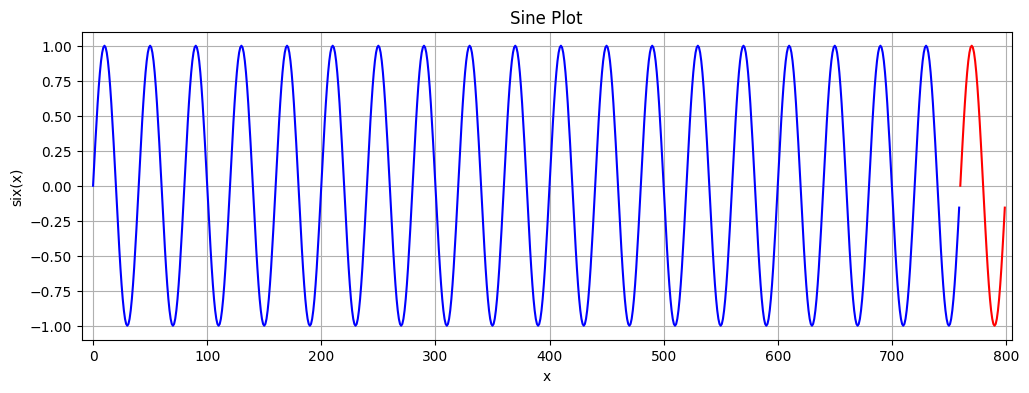

In [19]:
# Plot the training and testing sets



plt.figure(figsize=(12,4))
plt.xlim(-10,805)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("six(x)")
plt.title("Sine Plot")
plt.plot(train_set.numpy(),color ='b')
plt.plot(range(760,800),test_set.numpy(),color ='r')
plt.show()

In [20]:
# Create function to batch data

def input_data(seq, ws):
  out = []
  L = len(seq)

  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window, label))

  return out

In [21]:
# Split data into batches (using the above function)

window_size = 40
train_data = input_data(train_set, window_size)

In [22]:
# Length of the train data

len(train_data)

720

In [23]:
# Print the first batch

train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9101e-01,  8.0902e-01,
          7.0711e-01,  5.8779e-01,  4.5399e-01,  3.0902e-01,  1.5643e-01,
         -8.7423e-08, -1.5643e-01, -3.0902e-01, -4.5399e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5106e-01, -8.9101e-01, -8.0902e-01,
         -7.0711e-01, -5.8779e-01, -4.5399e-01, -3.0902e-01, -1.5643e-01]),
 tensor([1.7485e-07]))

### Defining the LSTM Model

In [26]:
# Define the LSTM class

import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1, 1, hidden_size), torch.zeros(1, 1, hidden_size))

    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq), -1))
        return pred[-1]


In [27]:
# Instantiate tge model

torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters() , lr =0.01)


In [ ]:
# Print the LSTM model



### Model Training

In [ ]:
# Define the training loop



## **Prediction with Alcohol Sales Dataset**

### Data Loading and Visualization

In [ ]:
# Load the CSV file as a pandas dataframe



In [ ]:
# Print the datafeame



In [ ]:
# Print information of the dataframe



In [ ]:
# Check for null values



In [ ]:
# Plot the time series data



### Data Preprocessing

In [ ]:
# Extract the time series values convert to float



In [ ]:
# Define train set size


# Split the data


In [ ]:
# Normlize the data using sklearn's MinMaxScaler (scale between -1 & 1)
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler


# Scale the train & test data


In [ ]:
# Define the window size

# Create batches


In [ ]:
# Print the fist batch



### Instantiate a LSTM model instance

In [ ]:
# Instantiate a new LSTM model instance


In [ ]:
# Criterion and optimizer


In [ ]:
# Define the training loop



### Model Predictions

In [ ]:
# Use the trained model for predictions



In [ ]:
# Inverse transform the predictions


In [ ]:
# Comparison with origial data


In [ ]:
# Plot the predictions on top of the training data



In [ ]:
# Plot the zoomed plot

